In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
import svgpathtools

In [63]:
path = svgpathtools.parse_path(open("track.path").read())
trackimg = plt.imread("trackbirdseye.png")

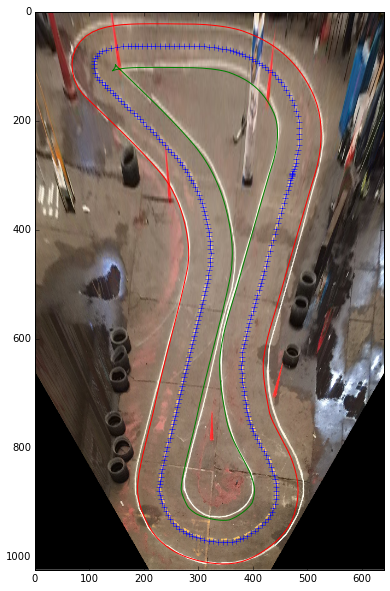

In [241]:
plt.rcParams["figure.figsize"] = (10, 10)
plt.imshow(trackimg)
plt.xlim(0, trackimg.shape[1])
plt.ylim(trackimg.shape[0], 0)
x = 2.05*np.array(map(path.point, np.linspace(0, 1, 300))) - 200
dx = 1j*np.array(map(path.derivative, np.linspace(0, 1, 300)))
dx /= np.abs(dx)
plt.plot(np.real(x), np.imag(x), '+')
lw = 40
plt.plot(np.real(x + lw*dx), np.imag(x + lw*dx))
plt.plot(np.real(x - lw*dx), np.imag(x - lw*dx))

In [50]:
''' we ideally want to get some equally spaced points here; the bezier curves aren't necessarily equally spaced.
'''

#np.abs(x[1:] - x[:-1])
print path.point(0), path.derivative(0)
print (path.point(0.0001) - path.point(0)) / (0.0001 * path.length())

(160.358+65.76j) (-0.746886310376-0.731646666699j)
(-0.746135630005-0.72970196878j)


In [247]:
def next_t(path, t, dist):
    p = path.point(t)
    L = path.length()
    t0 = t
    # t += 1.0 / np.abs(path.derivative(t))
    itr = 0
    while itr < 20:
        itr += 1
        p1 = path.point(t)
        err = np.abs(p1 - p) - dist
        d1 = path.derivative(t)
        if np.abs(err) < 1e-5:
            return t, p1, d1 / np.abs(d1)
        derr = np.abs(d1) * L
        #if err > dist:
        t -= np.clip(err / derr, -1e-2, 1e-2)
        t = np.clip(t, 0, 1)
    return t, p, d1 / np.abs(d1)

d0 = path.derivative(0)
pts = [[path.point(0), d0 / np.abs(d0)]]
t = 0
while t < 1:
    t, p, d = next_t(path, t, 11)
    pts.append([p, d])
#    p = path.point(t)
#    adp = np.abs(dp)
#    pts.append([p - 100, dp / adp, adp])
#    t += dt
pts = np.array(pts)


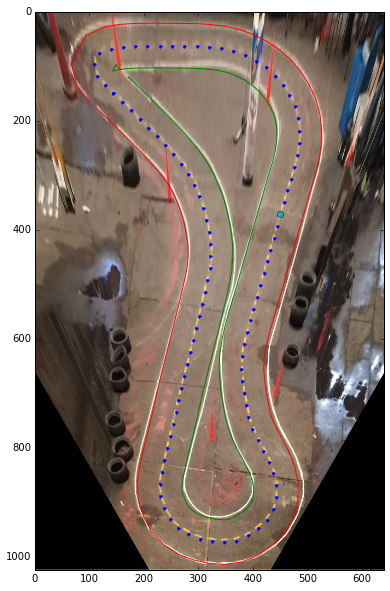

In [248]:
plt.xlim(0, trackimg.shape[1])
plt.ylim(trackimg.shape[0], 0)

x = 2.05*pts[:, 0] - 200
dx = 2.05j*pts[:, 1]

plt.imshow(trackimg)
plt.plot(np.real(x), np.imag(x), '.')
plt.plot(np.real(x + 20*dx), np.imag(x + 20*dx))
plt.plot(np.real(x - 20*dx), np.imag(x - 20*dx))
plt.plot(np.real(x[30]), np.imag(x[30]), 'o')

In [261]:
cpts = np.copy(pts)
cpts[:, 0] -= np.mean(pts[:, 0])

In [279]:
trackdata = np.vstack([np.real(cpts[:, 0]), -np.imag(cpts[:, 0]), np.real(cpts[:, 1]), -np.imag(cpts[:, 1])]).T
open("trackdata.f32", "wb").write(np.getbuffer(trackdata.astype(np.float32)))

In [278]:
cpts.shape

(105, 2)